<a href="https://colab.research.google.com/github/Jot4roKujo/Implementing-ML-Models/blob/main/SB_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [ ]:
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [ ]:
# Download Apache Spark binary: This link can change based on the version. Update this link with the latest version before using
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop2.7.tgz

# Unzip file
!tar -xvzf spark-3.2.0-bin-hadoop2.7.tgz

spark-3.2.0-bin-hadoop2.7/
spark-3.2.0-bin-hadoop2.7/NOTICE
spark-3.2.0-bin-hadoop2.7/kubernetes/
spark-3.2.0-bin-hadoop2.7/kubernetes/tests/
spark-3.2.0-bin-hadoop2.7/kubernetes/tests/python_executable_check.py
spark-3.2.0-bin-hadoop2.7/kubernetes/tests/autoscale.py
spark-3.2.0-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.2.0-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.2.0-bin-hadoop2.7/kubernetes/tests/decommissioning.py
spark-3.2.0-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.2.0-bin-hadoop2.7/kubernetes/tests/decommissioning_cleanup.py
spark-3.2.0-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.2.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.2.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/decom.sh
spark-3.2.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.2.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.2.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.2.0-bin-hadoop2.7/kubernetes/docker

# Install py-spark and dependencies

In [ ]:
!pip install -q findspark

# Install pyspark
!pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 46.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=1e714ae894fe9e865da34f6dd869ec906a308ac5d322b95ce21068805ef792d3
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop2.7"

In [ ]:
from  pyspark.sql  import SparkSession
spark = SparkSession.builder.appName('healthdata').getOrCreate()

In [ ]:
spark

#Read the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving health.csv to health.csv


In [ ]:
df_data=spark.read.csv("health.csv",inferSchema=True,header=True)

In [ ]:
df_data.show(5)

+-------------+-------------------+----+---------+---------+---------+---------+---------+----+----+----+----+----+----+----+----+----+---------+--------+---------+---------+---------+------+------+------+---------+---------+---------+---------+------+---------+--------+---------+---------+-------+---------+---------+--------+---------+---------+---------+---------+---------+---------+---------+--------+--------+---------+---------+---------+-------+--------+--------+---------+--------+-------+-------+---------+---------+---------+---------+------------+------------+------+--------+---------+--------+--------+-------+-------+-------+--------+-------+-------+--------+-------+---------+-------+--------+-------+------+------+-------+--------+--------+-------+--------+-------+-------+-------+-------+----+------+----+----+------------------+----------------+
|    reference|  effectiveDateTime|null|102737005|102739008|106070007|107647005|113079009|1158|1159|1160|1161|1162|1163|1164|1165|1166

#reName the columns

In [ ]:
df_data=df_data.withColumnRenamed('4525004 | emergency department patient visit| : 362981000 | qualifier value| = 260299005 | number |, 42752001| due to| = 38341003 | hypertension |','hypertension')

In [ ]:
df_data=df_data.withColumnRenamed('4525004 |emergency department patient visit| :362981000 |qualifier value| = 260299005 |number|, 42752001|due to| = 21639008|hypervolemia|','hypervolemia')

In [ ]:
print(f'Data types of all the columns is : {df_data.dtypes}')

Data types of all the columns is : [('reference', 'string'), ('effectiveDateTime', 'timestamp'), ('null', 'double'), ('102737005', 'double'), ('102739008', 'double'), ('106070007', 'string'), ('107647005', 'string'), ('113079009', 'double'), ('1158', 'double'), ('1159', 'double'), ('1160', 'double'), ('1161', 'double'), ('1162', 'double'), ('1163', 'double'), ('1164', 'double'), ('1165', 'double'), ('1166', 'double'), ('116676008', 'string'), ('15188001', 'string'), ('161898004', 'string'), ('164944000', 'double'), ('197480006', 'string'), ('2085-9', 'double'), ('2089-1', 'double'), ('2093-3', 'double'), ('247234006', 'string'), ('252577008', 'double'), ('263495000', 'string'), ('266995000', 'string'), ('2708-6', 'double'), ('276361009', 'double'), ('28036006', 'double'), ('284472007', 'double'), ('285055002', 'string'), ('29463-7', 'double'), ('301117000', 'double'), ('301145006', 'string'), ('35489007', 'string'), ('364095004', 'string'), ('365411005', 'double'), ('365415001', 'strin

#drop the features (it has no single value)

In [ ]:
data=df_data.drop('effectiveDateTime','null','106070007','107647005','116676008','15188001','161898004','197480006','247234006','263495000','266995000','285055002','301145006','35489007','364095004','365415001','365458002','365508006','366361007','36760000','38341003','386806002','389026000','391002003','39898005','405751000','41829006','439750006','443315005','hypertension','hypervolemia','46221000','472974007','49436004','53120007','55827005','703272007','72166-2','73211009','85354-9','88610006','89362005','8957000','female','male','transgender-female','transgender-male')


In [ ]:
data.show(5)

+-------------+---------+---------+---------+----+----+----+----+----+----+----+----+----+---------+------+------+------+---------+------+---------+--------+---------+-------+---------+---------+---------+-------+--------+-------+-------+---------+---------+------+-------+-------+-------+-------+-------+--------+-------+-------+------+------+--------+-------+-------+-------+-------+----+----+
|    reference|102737005|102739008|113079009|1158|1159|1160|1161|1162|1163|1164|1165|1166|164944000|2085-9|2089-1|2093-3|252577008|2708-6|276361009|28036006|284472007|29463-7|301117000|365411005|365845005|39156-5|39632005|41953-1|41982-0|422629000|443911005|4548-4|55423-8|55425-3|55426-1|6300007|63858-5|68130003|68999-2|73964-9|8302-2|8310-5|91573000|93830-8|93831-6|93832-4|96935-2| 987|none|
+-------------+---------+---------+---------+----+----+----+----+----+----+----+----+----+---------+------+------+------+---------+------+---------+--------+---------+-------+---------+---------+---------+---

#Replace mean value for all null values

In [ ]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['102737005',
 '102739008',
 '113079009',
 '1158',
 '1159',
 '1160',
 '1161',
 '1162',
 '1163',
 '1164',
 '1165',
 '1166',
 '164944000',
 '2085-9',
 '2089-1',
 '2093-3',
 '252577008',
 '2708-6',
 '276361009',
 '28036006',
 '284472007',
 '29463-7',
 '301117000',
 '365411005',
 '365845005',
 '39156-5',
 '39632005',
 '41953-1',
 '41982-0',
 '422629000',
 '443911005',
 '4548-4',
 '55423-8',
 '55425-3',
 '55426-1',
 '6300007',
 '63858-5',
 '68130003',
 '68999-2',
 '73964-9',
 '8302-2',
 '8310-5',
 '91573000',
 '93830-8',
 '93831-6',
 '93832-4',
 '96935-2',
 '987',],
    outputCols=["{}_imputed".format(c) for c in ['102737005',
 '102739008',
 '113079009',
 '1158',
 '1159',
 '1160',
 '1161',
 '1162',
 '1163',
 '1164',
 '1165',
 '1166',
 '164944000',
 '2085-9',
 '2089-1',
 '2093-3',
 '252577008',
 '2708-6',
 '276361009',
 '28036006',
 '284472007',
 '29463-7',
 '301117000',
 '365411005',
 '365845005',
 '39156-5',
 '39632005',
 '41953-1',
 '41982-0',
 '422629000',
 '443911005',
 '4548-4',
 '55423-8',
 '55425-3',
 '55426-1',
 '6300007',
 '63858-5',
 '68130003',
 '68999-2',
 '73964-9',
 '8302-2',
 '8310-5',
 '91573000',
 '93830-8',
 '93831-6',
 '93832-4',
 '96935-2',
 '987',

 ]]
    ).setStrategy("mean")

In [ ]:
imputed_data=imputer.fit(data).transform(data)

In [ ]:
imputed_data.show(5)

+-------------+---------+---------+---------+----+----+----+----+----+----+----+----+----+---------+------+------+------+---------+------+---------+--------+---------+-------+---------+---------+---------+-------+--------+-------+-------+---------+---------+------+-------+-------+-------+-------+-------+--------+-------+-------+------+------+--------+-------+-------+-------+-------+----+----+-----------------+-----------------+------------------+-----------------+------------+------------+------------+------------+------------+------------+------------+------------+------------------+-----------------+----------------+------------------+-----------------+--------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+---------------+------------------+-----------------+-----------------+-----------------+---------------+----------------+---------------+---------------+-----

#took only imputed features   remaining is  drop

In [ ]:
data_1=imputed_data.drop(
 '102737005',
 '102739008',
 '113079009',
 '1158',
 '1159',
 '1160',
 '1161',
 '1162',
 '1163',
 '1164',
 '1165',
 '1166',
 '164944000',
 '2085-9',
 '2089-1',
 '2093-3',
 '252577008',
 '2708-6',
 '276361009',
 '28036006',
 '284472007',
 '29463-7',
 '301117000',
 '365411005',
 '365845005',
 '39156-5',
 '39632005',
 '41953-1',
 '41982-0',
 '422629000',
 '443911005',
 '4548-4',
 '55423-8',
 '55425-3',
 '55426-1',
 '6300007',
 '63858-5',
 '68130003',
 '68999-2',
 '73964-9',
 '8302-2',
 '8310-5',
 '91573000',
 '93830-8',
 '93831-6',
 '93832-4',
 '96935-2',
 '987',
 'none')

In [ ]:
data_1.show()

+-------------+-----------------+-----------------+------------------+-----------------+------------+------------+------------+------------+------------+------------+------------+------------+------------------+-----------------+----------------+------------------+-----------------+--------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+----------------+------------------+---------------+-----------------+------------------+-----------------+-----------------+-----------------+--------------+----------------+-----------------+------------------+-----------------+-----------------+-----------+
|    reference|102737005_imputed|102739008_imputed| 113079009_imputed|     1158_imputed|1159_imputed|1160_imputed|1161_imputed|1162_imputed|1163_imputed|1164_imputed|116

In [ ]:
data_1.count(),len(data_1.columns)

(9736, 49)

#Applying  Vector assemblers

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
feat_cols=[
 '102737005_imputed',
 '102739008_imputed',
 '113079009_imputed',
 '1158_imputed',
 '1159_imputed',
 '1160_imputed',
 '1161_imputed',
 '1162_imputed',
 '1163_imputed',
 '1164_imputed',
 '1165_imputed',
 '1166_imputed',
 '164944000_imputed',
 '2085-9_imputed',
 '2089-1_imputed',
 '2093-3_imputed',
 '252577008_imputed',
 '2708-6_imputed',
 '276361009_imputed',
 '28036006_imputed',
 '284472007_imputed',
 '29463-7_imputed',
 '301117000_imputed',
 '365411005_imputed',
 '365845005_imputed',
 '39156-5_imputed',
 '39632005_imputed',
 '41953-1_imputed',
 '41982-0_imputed',
 '422629000_imputed',
 '443911005_imputed',
 '4548-4_imputed',
 '55423-8_imputed',
 '55425-3_imputed',
 '55426-1_imputed',
 '6300007_imputed',
 '63858-5_imputed',
 '68130003_imputed',
 '68999-2_imputed',
 '73964-9_imputed',
 '8302-2_imputed',
 '8310-5_imputed',
 '91573000_imputed',
 '93830-8_imputed',
 '93831-6_imputed',
 '93832-4_imputed',
 '96935-2_imputed',
 '987_imputed']

In [ ]:
assembler=VectorAssembler(inputCols=feat_cols,outputCol='features')

In [ ]:
final_data=assembler.transform(data_1)

In [ ]:
final_data.show()

+-------------+-----------------+-----------------+------------------+-----------------+------------+------------+------------+------------+------------+------------+------------+------------+------------------+-----------------+----------------+------------------+-----------------+--------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+----------------+------------------+---------------+-----------------+------------------+-----------------+-----------------+-----------------+--------------+----------------+-----------------+------------------+-----------------+-----------------+-----------+--------------------+
|    reference|102737005_imputed|102739008_imputed| 113079009_imputed|     1158_imputed|1159_imputed|1160_imputed|1161_imputed|1162_imputed|1163_imp

#applying Standard scalar

In [ ]:
from pyspark.ml.feature import StandardScaler


In [ ]:
scalar=StandardScaler(inputCol='features',outputCol='ScaledFeatures',withStd=True, withMean=False)

In [ ]:

scaler_model=scalar.fit(final_data)

In [ ]:
cluster_final=scaler_model.transform(final_data)

In [ ]:
cluster_final.show()

+-------------+-----------------+-----------------+------------------+-----------------+------------+------------+------------+------------+------------+------------+------------+------------+------------------+-----------------+----------------+------------------+-----------------+--------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+----------------+------------------+---------------+-----------------+------------------+-----------------+-----------------+-----------------+--------------+----------------+-----------------+------------------+-----------------+-----------------+-----------+--------------------+--------------------+
|    reference|102737005_imputed|102739008_imputed| 113079009_imputed|     1158_imputed|1159_imputed|1160_imputed|1161_imputed|

#Normalization or Standardizing using (Min-Max)

In [ ]:
from pyspark.ml.feature import MinMaxScaler


In [ ]:
min_max_scalar = MinMaxScaler (inputCol='features',outputCol='ScaledFeatures')

In [ ]:
fit_data =min_max_scalar.fit(final_data).transform(final_data)

In [ ]:
fit_data.show()

+-------------+-----------------+-----------------+------------------+-----------------+------------+------------+------------+------------+------------+------------+------------+------------+------------------+-----------------+----------------+------------------+-----------------+--------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+----------------+------------------+---------------+-----------------+------------------+-----------------+-----------------+-----------------+--------------+----------------+-----------------+------------------+-----------------+-----------------+-----------+--------------------+--------------------+
|    reference|102737005_imputed|102739008_imputed| 113079009_imputed|     1158_imputed|1159_imputed|1160_imputed|1161_imputed|

K-Means

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='ScaledFeatures', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):

    KMeans_algo=KMeans(featuresCol='ScaledFeatures', k=i)

    KMeans_fit=KMeans_algo.fit(fit_data)

    output=KMeans_fit.transform(fit_data)



    score=evaluator.evaluate(output)

    silhouette_score.append(score)

    print("Silhouette Score:",score)

Silhouette Score: 0.45174179793174124
Silhouette Score: 0.4410248290320556
Silhouette Score: 0.4095548875006869
Silhouette Score: 0.4329771871334638
Silhouette Score: 0.4464206405482848
Silhouette Score: 0.4301872957583185
Silhouette Score: 0.36395455960214834
Silhouette Score: 0.30963810687205234


Text(0, 0.5, 'cost')

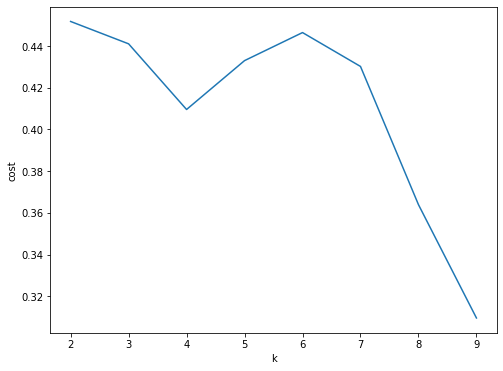

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')


##Normalization or Standardizing using (Z-Score)

In [ ]:
from pyspark.sql.functions import*
def standardize_data(data_1, columns):
  aggExpr = []
  aggStd = []
  for column in columns:
    aggExpr.append(mean(data_1[column]).alias(column))
    aggStd.append(stddev(data_1[column]).alias(column +'_stddev'))

  averages = data_1.agg(*aggExpr).collect()[0]
  std_devs = data_1.agg(*aggStd).collect()[0]

  for column in columns:
    data_1 = data_1.withColumn(column + '_norm',((data_1[column] - averages[column]) / std_devs[column + '_stddev']))



  return data_1






In [ ]:
data_7 = standardize_data(data_1,data_1.columns)
data_7.show()

+-------------+-----------------+-----------------+------------------+-----------------+------------+------------+------------+------------+------------+------------+------------+------------+------------------+-----------------+----------------+------------------+-----------------+--------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+----------------+------------------+---------------+-----------------+------------------+-----------------+-----------------+-----------------+--------------+----------------+-----------------+------------------+-----------------+-----------------+-----------+--------------+----------------------+----------------------+----------------------+--------------------+-----------------+-----------------+-----------------+-----------

# took only normalization columns

In [ ]:
data_8 =data_7.drop('102737005_imputed',
 '102739008_imputed',
 '113079009_imputed',
 '1158_imputed',
 '1159_imputed',
 '1160_imputed',
 '1161_imputed',
 '1162_imputed',
 '1163_imputed',
 '1164_imputed',
 '1165_imputed',
 '1166_imputed',
 '164944000_imputed',
 '2085-9_imputed',
 '2089-1_imputed',
 '2093-3_imputed',
 '252577008_imputed',
 '2708-6_imputed',
 '276361009_imputed',
 '28036006_imputed',
 '284472007_imputed',
 '29463-7_imputed',
 '301117000_imputed',
 '365411005_imputed',
 '365845005_imputed',
 '39156-5_imputed',
 '39632005_imputed',
 '41953-1_imputed',
 '41982-0_imputed',
 '422629000_imputed',
 '443911005_imputed',
 '4548-4_imputed',
 '55423-8_imputed',
 '55425-3_imputed',
 '55426-1_imputed',
 '6300007_imputed',
 '63858-5_imputed',
 '68130003_imputed',
 '68999-2_imputed',
 '73964-9_imputed',
 '8302-2_imputed',
 '8310-5_imputed',
 '91573000_imputed',
 '93830-8_imputed',
 '93831-6_imputed',
 '93832-4_imputed',
 '96935-2_imputed',
 '987_imputed',
 'reference_norm',)

In [ ]:
data_8.show(5)

+-------------+----------------------+----------------------+----------------------+--------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+----------------------+--------------------+--------------------+--------------------+----------------------+-------------------+----------------------+---------------------+----------------------+--------------------+----------------------+----------------------+----------------------+--------------------+---------------------+--------------------+--------------------+----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+----------------

#Drop the null values

In [ ]:
data_9=data_8.drop('1159_imputed_norm','1160_imputed_norm','1161_imputed_norm','1163_imputed_norm','1164_imputed_norm','1165_imputed_norm','987_imputed_norm')

#Vector Assembler



In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
feat_cols_1 = ['102737005_imputed_norm',
 '102739008_imputed_norm',
 '113079009_imputed_norm',
 '1158_imputed_norm',
 '1162_imputed_norm',
 '1166_imputed_norm',
 '164944000_imputed_norm',
 '2085-9_imputed_norm',
 '2089-1_imputed_norm',
 '2093-3_imputed_norm',
 '252577008_imputed_norm',
 '2708-6_imputed_norm',
 '276361009_imputed_norm',
 '28036006_imputed_norm',
 '284472007_imputed_norm',
 '29463-7_imputed_norm',
 '301117000_imputed_norm',
 '365411005_imputed_norm',
 '365845005_imputed_norm',
 '39156-5_imputed_norm',
 '39632005_imputed_norm',
 '41953-1_imputed_norm',
 '41982-0_imputed_norm',
 '422629000_imputed_norm',
 '443911005_imputed_norm',
 '4548-4_imputed_norm',
 '55423-8_imputed_norm',
 '55425-3_imputed_norm',
 '55426-1_imputed_norm',
 '6300007_imputed_norm',
 '63858-5_imputed_norm',
 '68130003_imputed_norm',
 '68999-2_imputed_norm',
 '73964-9_imputed_norm',
 '8302-2_imputed_norm',
 '8310-5_imputed_norm',
 '91573000_imputed_norm',
 '93830-8_imputed_norm',
 '93831-6_imputed_norm',
 '93832-4_imputed_norm',
 '96935-2_imputed_norm']

In [ ]:
assembler_1=VectorAssembler(inputCols=feat_cols_1,outputCol='features_2')

In [ ]:
final_data_2=assembler_1.transform(data_9)

In [ ]:
final_data_2.show()

+-------------+----------------------+----------------------+----------------------+--------------------+-----------------+-----------------+----------------------+--------------------+--------------------+--------------------+----------------------+-------------------+----------------------+---------------------+----------------------+--------------------+----------------------+----------------------+----------------------+--------------------+---------------------+--------------------+--------------------+----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    reference|102737005_imputed_norm|102739008_imputed_norm|113079009_imputed_no

#Standard Scaler

In [ ]:
from pyspark.ml.feature import StandardScaler
scalar_1=StandardScaler(inputCol='features_2',outputCol='ScaledFeatures_1',withStd=True, withMean=False)


In [ ]:
scaler_model_1=scalar_1.fit(final_data_2)

In [ ]:
cluster_final_1=scaler_model_1.transform(final_data_2)

In [ ]:
cluster_final_1.show()

+-------------+----------------------+----------------------+----------------------+--------------------+-----------------+-----------------+----------------------+--------------------+--------------------+--------------------+----------------------+-------------------+----------------------+---------------------+----------------------+--------------------+----------------------+----------------------+----------------------+--------------------+---------------------+--------------------+--------------------+----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    reference|102737005_imputed_norm|102739008_imputed_norm

K-MEANS

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='ScaledFeatures_1', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):

    KMeans_algo=KMeans(featuresCol='ScaledFeatures_1', k=i)

    KMeans_fit=KMeans_algo.fit(cluster_final_1)

    output=KMeans_fit.transform(cluster_final_1)



    score=evaluator.evaluate(output)

    silhouette_score.append(score)

    print("Silhouette Score:",score)

Silhouette Score: 0.9965216475993265
Silhouette Score: 0.9956025220268763
Silhouette Score: 0.9913991486542983
Silhouette Score: 0.761294044097201
Silhouette Score: 0.6038185340281459
Silhouette Score: 0.22044716226063935
Silhouette Score: -0.25438048467798297
Silhouette Score: 0.23429770375890427


Text(0, 0.5, 'cost')

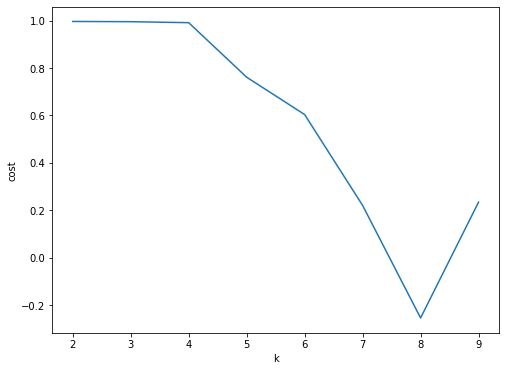

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [ ]:
 KMeans_fit.transform(cluster_final_1).groupBy('prediction','reference').count().show(50)

+----------+--------------------+-----+
|prediction|           reference|count|
+----------+--------------------+-----+
|         4|       Patient/58530|   83|
|         0|   Patient/589577532|   10|
|         0|   Patient/739849315|    6|
|         4|       Patient/49139|   55|
|         0|  Patient/1946038832|    4|
|         0|  Patient/1009492400|    2|
|         4|       Patient/13077|  161|
|         0|   Patient/170265530|    2|
|         0|  Patient/2093444183|    2|
|         4|       Patient/74535|  183|
|         0|       Patient/58530|  239|
|         4|   Patient/517517735|   26|
|         4|   Patient/451714507|    1|
|         0|       Patient/11444|   95|
|         0|           Patient/6|    2|
|         0|       Patient/65377| 1115|
|         4|       Patient/36144|   53|
|         4|       Patient/55458|   51|
|         0|           Patient/5|    4|
|         4|       Patient/23503|   59|
|         0|        Patient/3267|  101|
|         4|        Patient/9808|   34|


In [ ]:
KMeans_fit.clusterCenters()

[array([-1.02438256e-02, -1.02425141e-02, -6.69992254e-03,  1.49393468e-17,
         0.00000000e+00,  0.00000000e+00,  1.39306605e-03, -2.07721440e-02,
         2.30045494e-02,  1.31584703e-02, -6.11068289e-03, -8.01040943e-03,
         5.22332921e-03, -1.06061534e-02,  2.09518773e-03, -8.53844440e-03,
        -6.24050095e-19, -1.46967109e-17,  3.17499086e-03, -4.20639997e-03,
         9.94049747e-04,  7.83075928e-03,  7.67778722e-02,  6.13729250e-03,
        -1.44075845e-03, -5.93168497e-03,  1.02684913e-03,  4.12238836e-02,
         1.35663625e-01, -4.53534062e-03,  2.15216546e-18,  1.11762711e-18,
         1.17418131e-01,  5.53721483e-03,  8.84821669e-03,  1.88437306e-02,
         1.50547304e-02, -2.89624657e-01,  8.73048609e-02, -2.76365057e-01,
         4.41643472e-02]),
 array([ 2.40040698e-18,  1.01563440e-17,  7.35107847e-18,  2.99671988e-18,
         0.00000000e+00,  0.00000000e+00,  2.03699828e-17,  3.53259076e-16,
         1.79432789e-17, -8.67436595e-17,  1.82452428e-19,  1

#Extra draft

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
columns_to_scale = ["102737005_imputed","102739008_imputed","113079009_imputed","1158_imputed","1159_imputed","1160_imputed","1161_imputed","1162_imputed","1163_imputed","1164_imputed","1165_imputed","1166_imputed","164944000_imputed","2085-9_imputed","2089-1_imputed","2093-3_imputed","252577008_imputed","2708-6_imputed","276361009_imputed","28036006_imputed","284472007_imputed","29463-7_imputed","301117000_imputed","365411005_imputed","365845005_imputed","39156-5_imputed","39632005_imputed","41953-1_imputed","41982-0_imputed","422629000_imputed","443911005_imputed","4548-4_imputed", "55423-8_imputed","55425-3_imputed","55426-1_imputed","6300007_imputed","63858-5_imputed","68130003_imputed", "68999-2_imputed","73964-9_imputed","8302-2_imputed","8310-5_imputed","91573000_imputed","93830-8_imputed","93831-6_imputed","93832-4_imputed", "96935-2_imputed","987_imputed"]
assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in columns_to_scale]
scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]
pipeline = Pipeline(stages=assemblers + scalers)
scalerModel = pipeline.fit(data_1)
scaledData = scalerModel.transform(data_1)

In [ ]:
from pyspark.sql import functions as f
names = {x + "_scaled": x for x in columns_to_scale}
scaledData = scaledData.select([f.col(c).alias(names[c]) for c in names.keys()])